DATASET STATISTICAL ANALYSIS

1. CLASS DISTRIBUTION
   Total Images: 27558
   Number of Classes: 2
   - Parasitized: 13779 (50.00%)
   - Uninfected: 13779 (50.00%)
   - Imbalance Ratio: 1.00:1


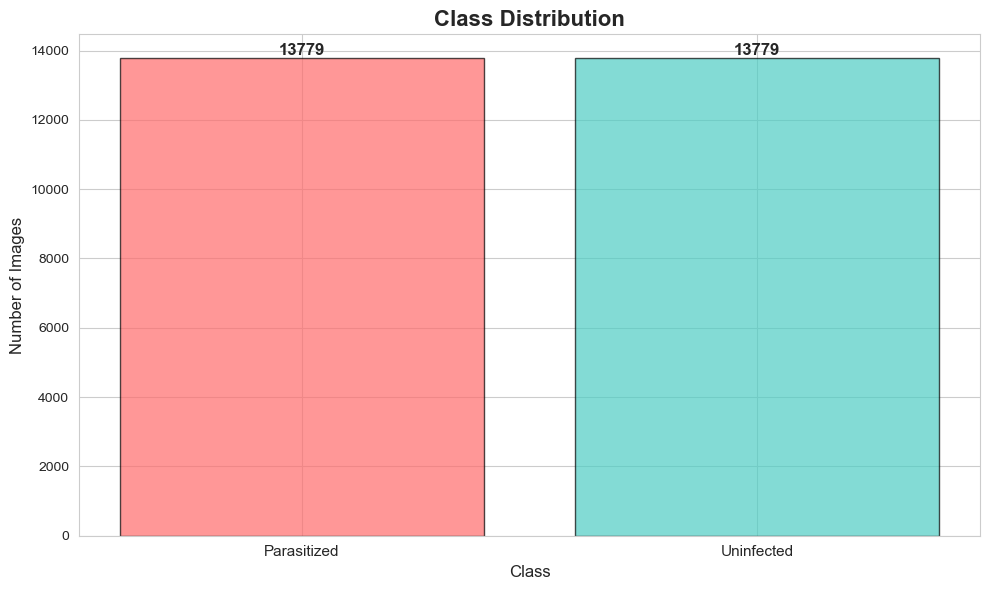


2. IMAGE DIMENSIONS ANALYSIS
   Analyzing 1000 random samples...

   WIDTH Statistics:
   - Min: 64, Max: 265
   - Mean: 132.94, Std: 19.93
   - Median: 133.00
   - Q1: 121.00, Q3: 145.00

   HEIGHT Statistics:
   - Min: 76, Max: 346
   - Mean: 134.01, Std: 21.66
   - Median: 133.00
   - Q1: 121.00, Q3: 145.00

   ASPECT RATIO Statistics:
   - Min: 0.487, Max: 1.930
   - Mean: 1.004, Std: 0.150

   COLOR CHANNELS:
   - 3 channel(s): 1000 images


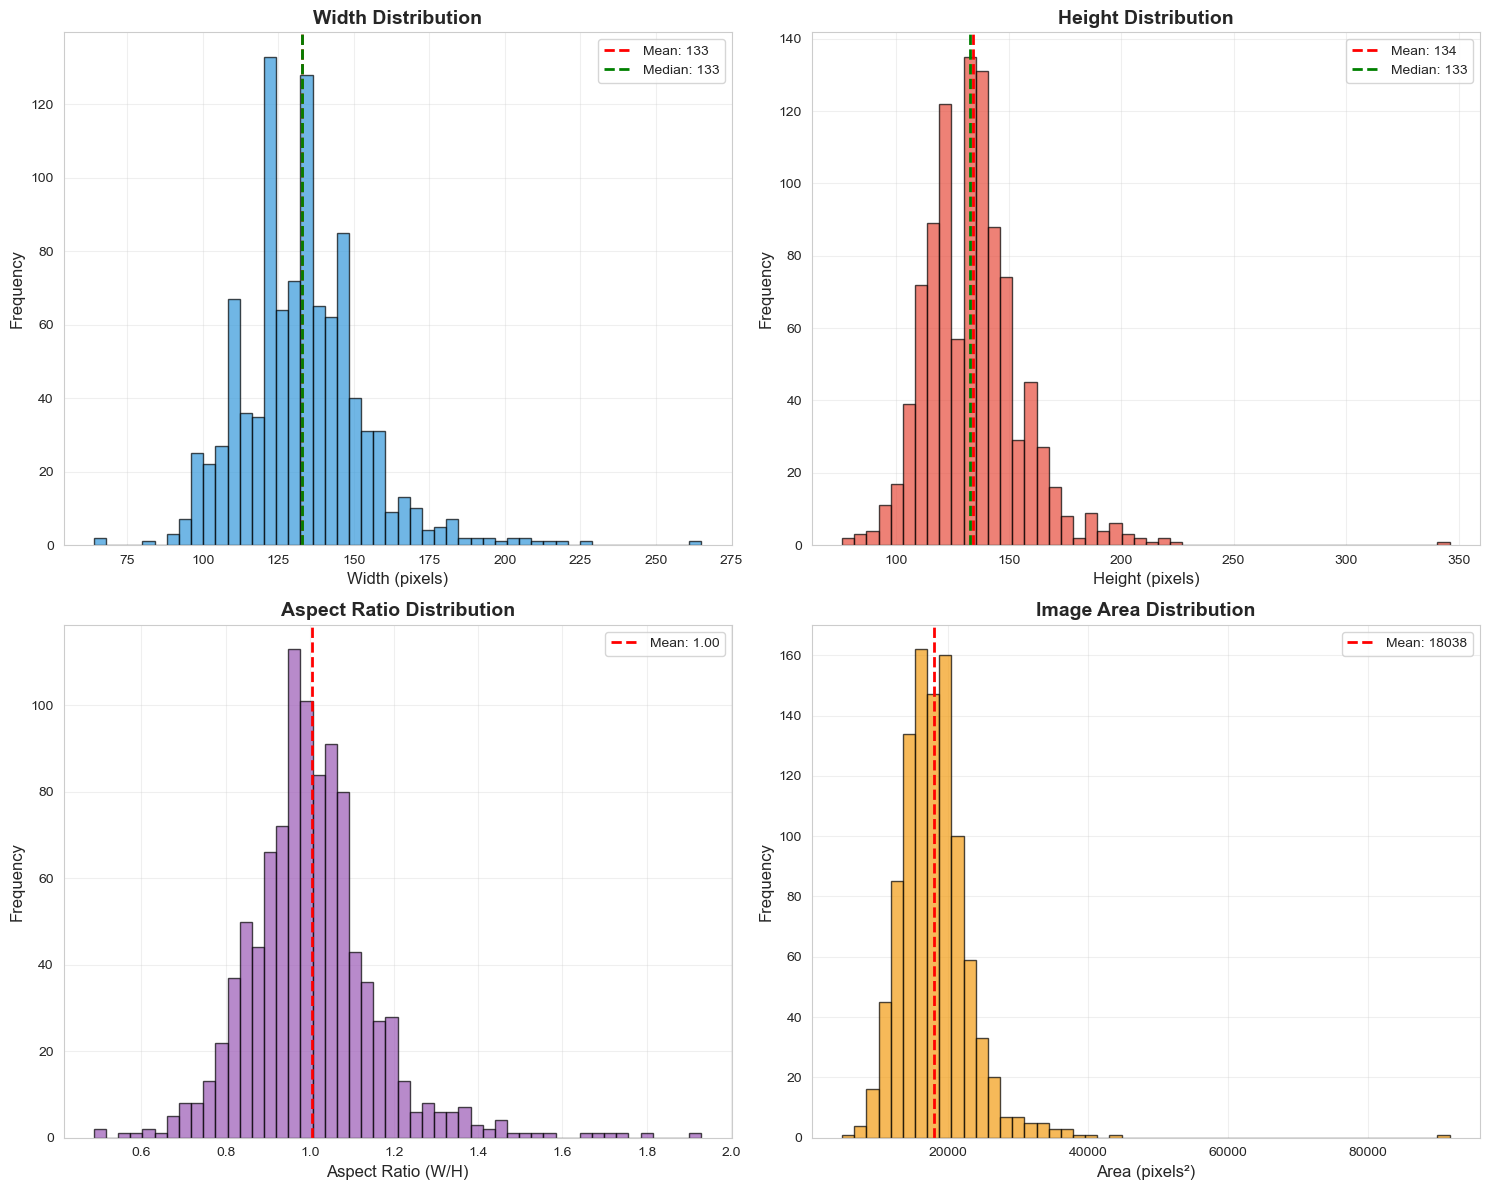


3. PIXEL INTENSITY ANALYSIS
   Analyzing 500 random samples...

   OVERALL DATASET (0-255 range):
   R Channel:
   - Mean: 135.55 ± 16.43
   - Std: 84.87 ± 10.35
   G Channel:
   - Mean: 108.73 ± 14.26
   - Std: 68.62 ± 6.82
   B Channel:
   - Mean: 115.40 ± 16.33
   - Std: 71.75 ± 7.49

   Overall Mean: 119.89
   Overall Std: 75.08

   PER-CLASS STATISTICS:

   Parasitized:
   - R: 135.68
   - G: 104.45
   - B: 112.16

   Uninfected:
   - R: 135.41
   - G: 113.02
   - B: 118.64


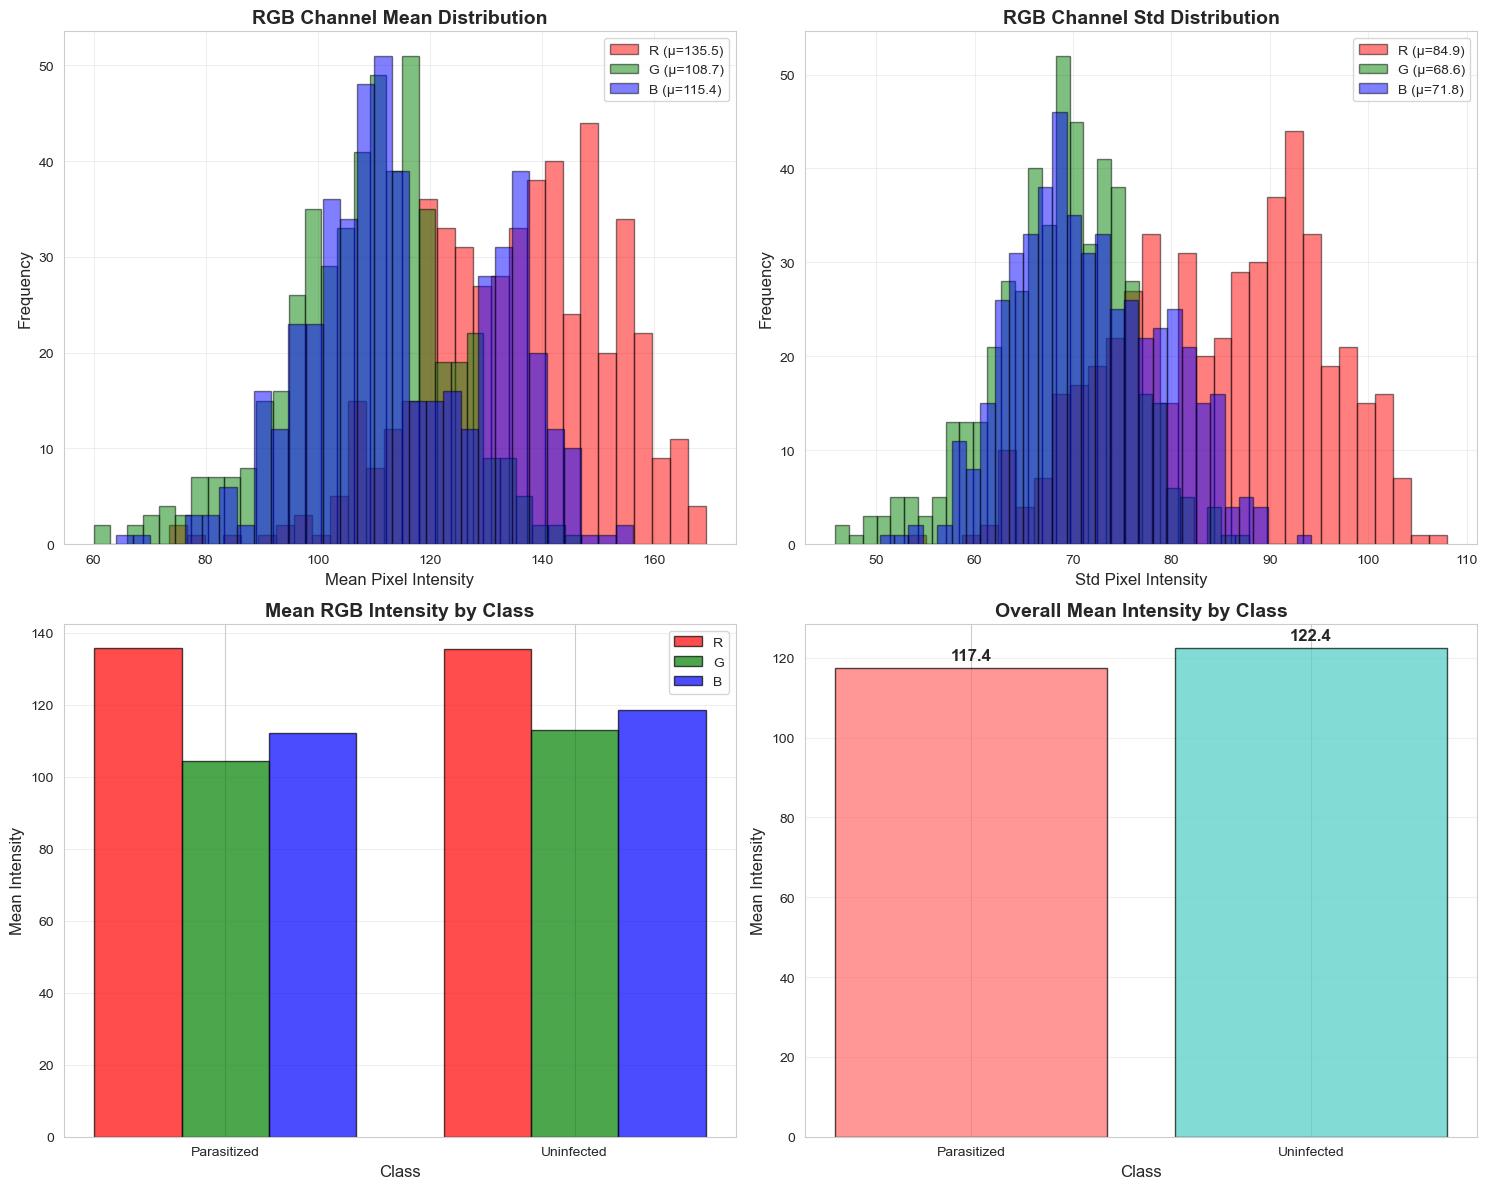


4. SUMMARY STATISTICS

              Metric  Value
        Total Images  27558
             Classes      2
     Imbalance Ratio 1.00:1
          Mean Width 132.94
         Mean Height 134.01
   Mean Aspect Ratio  1.004
Mean Pixel Intensity 119.89
 Std Pixel Intensity  75.08

ANALYSIS COMPLETE


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

def analyze_dataset(dataset_path, sample_size=1000):
    """
    Complete statistical analysis of Parasitized vs Uninfected cell dataset
    """
    
    # Get class folders
    classes = [d for d in os.listdir(dataset_path) 
               if os.path.isdir(os.path.join(dataset_path, d))]
    
    print("="*80)
    print("DATASET STATISTICAL ANALYSIS")
    print("="*80)
    
    # ========== 1. CLASS DISTRIBUTION ==========
    class_counts = {}
    all_files = {}
    
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        files = [f for f in os.listdir(class_path) 
                if f.endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(files)
        all_files[class_name] = files
    
    total_images = sum(class_counts.values())
    
    print(f"\n1. CLASS DISTRIBUTION")
    print(f"   Total Images: {total_images}")
    print(f"   Number of Classes: {len(classes)}")
    for class_name, count in class_counts.items():
        percentage = (count / total_images) * 100
        print(f"   - {class_name}: {count} ({percentage:.2f}%)")
    
    # Imbalance ratio
    counts_list = list(class_counts.values())
    imbalance_ratio = max(counts_list) / min(counts_list)
    print(f"   - Imbalance Ratio: {imbalance_ratio:.2f}:1")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), 
            color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='black')
    plt.title('Class Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.xticks(fontsize=11)
    for i, (cls, count) in enumerate(class_counts.items()):
        plt.text(i, count + 100, str(count), ha='center', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    
    # ========== 2. IMAGE DIMENSIONS ANALYSIS ==========
    print(f"\n2. IMAGE DIMENSIONS ANALYSIS")
    print(f"   Analyzing {sample_size} random samples...")
    
    widths = []
    heights = []
    aspect_ratios = []
    areas = []
    channels_list = []
    
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        sample_files = np.random.choice(all_files[class_name], 
                                       min(sample_size//len(classes), len(all_files[class_name])), 
                                       replace=False)
        
        for img_file in sample_files:
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path)
                w, h = img.size
                widths.append(w)
                heights.append(h)
                aspect_ratios.append(w / h)
                areas.append(w * h)
                
                img_array = np.array(img)
                if len(img_array.shape) == 3:
                    channels_list.append(img_array.shape[2])
                else:
                    channels_list.append(1)
            except Exception as e:
                continue
    
    # Statistics
    print(f"\n   WIDTH Statistics:")
    print(f"   - Min: {np.min(widths)}, Max: {np.max(widths)}")
    print(f"   - Mean: {np.mean(widths):.2f}, Std: {np.std(widths):.2f}")
    print(f"   - Median: {np.median(widths):.2f}")
    print(f"   - Q1: {np.percentile(widths, 25):.2f}, Q3: {np.percentile(widths, 75):.2f}")
    
    print(f"\n   HEIGHT Statistics:")
    print(f"   - Min: {np.min(heights)}, Max: {np.max(heights)}")
    print(f"   - Mean: {np.mean(heights):.2f}, Std: {np.std(heights):.2f}")
    print(f"   - Median: {np.median(heights):.2f}")
    print(f"   - Q1: {np.percentile(heights, 25):.2f}, Q3: {np.percentile(heights, 75):.2f}")
    
    print(f"\n   ASPECT RATIO Statistics:")
    print(f"   - Min: {np.min(aspect_ratios):.3f}, Max: {np.max(aspect_ratios):.3f}")
    print(f"   - Mean: {np.mean(aspect_ratios):.3f}, Std: {np.std(aspect_ratios):.3f}")
    
    print(f"\n   COLOR CHANNELS:")
    channel_counts = Counter(channels_list)
    for ch, count in channel_counts.items():
        print(f"   - {ch} channel(s): {count} images")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Width distribution
    axes[0, 0].hist(widths, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
    axes[0, 0].axvline(np.mean(widths), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(widths):.0f}')
    axes[0, 0].axvline(np.median(widths), color='green', linestyle='--', 
                       linewidth=2, label=f'Median: {np.median(widths):.0f}')
    axes[0, 0].set_title('Width Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Width (pixels)', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Height distribution
    axes[0, 1].hist(heights, bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
    axes[0, 1].axvline(np.mean(heights), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(heights):.0f}')
    axes[0, 1].axvline(np.median(heights), color='green', linestyle='--', 
                       linewidth=2, label=f'Median: {np.median(heights):.0f}')
    axes[0, 1].set_title('Height Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Height (pixels)', fontsize=12)
    axes[0, 1].set_ylabel('Frequency', fontsize=12)
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # Aspect ratio distribution
    axes[1, 0].hist(aspect_ratios, bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
    axes[1, 0].axvline(np.mean(aspect_ratios), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(aspect_ratios):.2f}')
    axes[1, 0].set_title('Aspect Ratio Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Aspect Ratio (W/H)', fontsize=12)
    axes[1, 0].set_ylabel('Frequency', fontsize=12)
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # Image area distribution
    axes[1, 1].hist(areas, bins=50, color='#f39c12', alpha=0.7, edgecolor='black')
    axes[1, 1].axvline(np.mean(areas), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(areas):.0f}')
    axes[1, 1].set_title('Image Area Distribution', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Area (pixels²)', fontsize=12)
    axes[1, 1].set_ylabel('Frequency', fontsize=12)
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    
    # ========== 3. PIXEL INTENSITY ANALYSIS ==========
    print(f"\n3. PIXEL INTENSITY ANALYSIS")
    print(f"   Analyzing 500 random samples...")
    
    all_means = {'R': [], 'G': [], 'B': []}
    all_stds = {'R': [], 'G': [], 'B': []}
    class_means = {cls: {'R': [], 'G': [], 'B': []} for cls in classes}
    
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        sample_files = np.random.choice(all_files[class_name], 
                                       min(250, len(all_files[class_name])), 
                                       replace=False)
        
        for img_file in sample_files:
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path).convert('RGB')
                img_array = np.array(img)
                
                for i, channel in enumerate(['R', 'G', 'B']):
                    ch_mean = np.mean(img_array[:, :, i])
                    ch_std = np.std(img_array[:, :, i])
                    all_means[channel].append(ch_mean)
                    all_stds[channel].append(ch_std)
                    class_means[class_name][channel].append(ch_mean)
            except Exception as e:
                continue
    
    # Overall statistics
    print(f"\n   OVERALL DATASET (0-255 range):")
    for channel in ['R', 'G', 'B']:
        print(f"   {channel} Channel:")
        print(f"   - Mean: {np.mean(all_means[channel]):.2f} ± {np.std(all_means[channel]):.2f}")
        print(f"   - Std: {np.mean(all_stds[channel]):.2f} ± {np.std(all_stds[channel]):.2f}")
    
    overall_mean = np.mean([np.mean(all_means[ch]) for ch in ['R', 'G', 'B']])
    overall_std = np.mean([np.mean(all_stds[ch]) for ch in ['R', 'G', 'B']])
    print(f"\n   Overall Mean: {overall_mean:.2f}")
    print(f"   Overall Std: {overall_std:.2f}")
    
    # Per-class statistics
    print(f"\n   PER-CLASS STATISTICS:")
    for class_name in classes:
        print(f"\n   {class_name}:")
        for channel in ['R', 'G', 'B']:
            if len(class_means[class_name][channel]) > 0:
                print(f"   - {channel}: {np.mean(class_means[class_name][channel]):.2f}")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # RGB mean distribution
    colors_rgb = ['red', 'green', 'blue']
    for i, (channel, color) in enumerate(zip(['R', 'G', 'B'], colors_rgb)):
        axes[0, 0].hist(all_means[channel], bins=30, alpha=0.5, 
                       label=f'{channel} (μ={np.mean(all_means[channel]):.1f})', 
                       color=color, edgecolor='black')
    axes[0, 0].set_title('RGB Channel Mean Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Mean Pixel Intensity', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # RGB std distribution
    for i, (channel, color) in enumerate(zip(['R', 'G', 'B'], colors_rgb)):
        axes[0, 1].hist(all_stds[channel], bins=30, alpha=0.5, 
                       label=f'{channel} (μ={np.mean(all_stds[channel]):.1f})', 
                       color=color, edgecolor='black')
    axes[0, 1].set_title('RGB Channel Std Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Std Pixel Intensity', fontsize=12)
    axes[0, 1].set_ylabel('Frequency', fontsize=12)
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # Per-class RGB comparison
    x_pos = np.arange(len(classes))
    width = 0.25
    for i, (channel, color) in enumerate(zip(['R', 'G', 'B'], colors_rgb)):
        means_per_class = [np.mean(class_means[cls][channel]) if len(class_means[cls][channel]) > 0 else 0 
                          for cls in classes]
        axes[1, 0].bar(x_pos + i*width, means_per_class, width, 
                      label=channel, color=color, alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Mean RGB Intensity by Class', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Class', fontsize=12)
    axes[1, 0].set_ylabel('Mean Intensity', fontsize=12)
    axes[1, 0].set_xticks(x_pos + width)
    axes[1, 0].set_xticklabels(classes)
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3, axis='y')
    
    # Overall mean comparison
    overall_class_means = [np.mean([np.mean(class_means[cls][ch]) 
                                   for ch in ['R', 'G', 'B'] if len(class_means[cls][ch]) > 0]) 
                          for cls in classes]
    axes[1, 1].bar(classes, overall_class_means, 
                  color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='black')
    axes[1, 1].set_title('Overall Mean Intensity by Class', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Class', fontsize=12)
    axes[1, 1].set_ylabel('Mean Intensity', fontsize=12)
    for i, (cls, val) in enumerate(zip(classes, overall_class_means)):
        axes[1, 1].text(i, val + 2, f'{val:.1f}', ha='center', 
                       fontsize=12, fontweight='bold')
    axes[1, 1].grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    
    # ========== 4. SUMMARY STATISTICS TABLE ==========
    print(f"\n4. SUMMARY STATISTICS")
    
    summary_data = {
        'Metric': ['Total Images', 'Classes', 'Imbalance Ratio', 
                   'Mean Width', 'Mean Height', 'Mean Aspect Ratio',
                   'Mean Pixel Intensity', 'Std Pixel Intensity'],
        'Value': [
            total_images,
            len(classes),
            f'{imbalance_ratio:.2f}:1',
            f'{np.mean(widths):.2f}',
            f'{np.mean(heights):.2f}',
            f'{np.mean(aspect_ratios):.3f}',
            f'{overall_mean:.2f}',
            f'{overall_std:.2f}'
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    print("\n" + summary_df.to_string(index=False))
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE")
    print("="*80)
    
    return {
        'class_counts': class_counts,
        'dimensions': {'widths': widths, 'heights': heights, 
                      'aspect_ratios': aspect_ratios},
        'pixel_stats': {'means': all_means, 'stds': all_stds},
        'summary': summary_df
    }


# Run analysis
dataset_path = r"C:\Users\USER\honors-final-project\models\malaria_dataset"
stats = analyze_dataset(dataset_path, sample_size=1000)
